### **跳空研究** 
- 1345 to 1500 Price v.s 0500 to 0800 Price

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from tqdm import tqdm
from zoneinfo import ZoneInfo
import cufflinks as cf
cf.go_offline()

# Statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf

c:\Users\A51857\AppData\Local\anaconda3\envs\test\lib\importlib\__init__.py:126: UserWarning:

A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.23.1)



In [3]:
def accuracy_matrix(df,X:str,Y:str):
    df_test = df[[X,Y]].copy()
    df_test['accuracy'] = np.where((df_test[X]==1)&(df_test[Y]==1),'TP',np.where((df_test[X]==1)&(df_test[Y]==-1),'FP',np.where((df_test[X]==-1)&(df_test[Y]==1),'FN',np.where((df_test[X]==-1)&(df_test[Y]==-1),'TN','0'))))
    accuracy_matrix = pd.DataFrame(columns = ['標的2方向=1','標的2方向=-1'],index = ['標的1方向=1','標的1方向=-1'])
    tp = df_test[df_test['accuracy']=='TP']
    fp = df_test[df_test['accuracy']=='FP']
    fn = df_test[df_test['accuracy']=='FN']
    tn = df_test[df_test['accuracy']=='TN']
    accuracy_matrix.loc['標的1方向=1','標的2方向=1'] = len(tp)
    accuracy_matrix.loc['標的1方向=1','標的2方向=-1'] = len(fp)
    accuracy_matrix.loc['標的1方向=-1','標的2方向=1'] = len(fn)
    accuracy_matrix.loc['標的1方向=-1','標的2方向=-1'] = len(tn)

    print(f'Prevaience: {round(((len(tp)+len(fn))/len(df_test))*100,4)} %')
    print(f'Accuracy:{round(((len(tp)+len(tn))/len(df_test))*100,4)} %')
    print(f'Precision:{round((len(tp)/(len(tp)+len(fp)))*100,4)} %')
    print(f'Recall:{round((len(tp)/(len(tp)+len(fn)))*100,4)} %')
    print(f'F1 Score: {round((2/(1/(len(tp)/(len(tp)+len(fp)))+1/(len(tp)/(len(tp)+len(fn)))))*100,4)} %')

    return accuracy_matrix

In [ ]:
data = pd.read_csv('Data/TXFC1_1min.txt')
data['T'] = pd.to_datetime(data['Date']+' '+data['Time'])
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.date
data = data.set_index('T')
data.tail()

,Date,Time,Open,High,Low,Close,Volume
T,,,,,,,
2025-02-06 13:09:00,2025-02-06,13:09:00,23275,23285,23274,23277,0
2025-02-06 13:10:00,2025-02-06,13:10:00,23277,23282,23274,23279,0
2025-02-06 13:11:00,2025-02-06,13:11:00,23279,23284,23274,23277,0
2025-02-06 13:12:00,2025-02-06,13:12:00,23278,23284,23275,23281,0
2025-02-06 13:13:00,2025-02-06,13:13:00,23282,23286,23281,23285,0


In [5]:
data_nq = pd.read_csv('Data/NQC1_1min.txt')
data_nq['T'] = pd.to_datetime(data_nq['Date']+' '+data_nq['Time'])
data_nq['Date'] = pd.to_datetime(data_nq['Date'])
data_nq = data_nq.set_index('T')
data_nq.index = data_nq.index + timedelta(hours=14)
data_nq = data_nq.loc['2019-01-02':]
data_nq

,Date,Time,Open,High,Low,Close,Volume
T,,,,,,,
2019-01-02 07:01:00,2019-01-01,17:01:00,6349.5,6355.8,6344.0,6353.0,332
2019-01-02 07:02:00,2019-01-01,17:02:00,6352.5,6364.8,6351.5,6361.3,296
2019-01-02 07:03:00,2019-01-01,17:03:00,6360.8,6371.5,6359.3,6368.5,339
2019-01-02 07:04:00,2019-01-01,17:04:00,6369.3,6371.8,6366.0,6366.3,195
2019-01-02 07:05:00,2019-01-01,17:05:00,6367.0,6367.5,6364.5,6366.3,154
...,...,...,...,...,...,...,...
2025-02-12 09:09:00,2025-02-11,19:09:00,21804.0,21808.0,21802.8,21806.8,0
2025-02-12 09:10:00,2025-02-11,19:10:00,21806.8,21808.3,21804.5,21805.3,0
2025-02-12 09:11:00,2025-02-11,19:11:00,21805.3,21810.3,21805.3,21807.8,0


In [112]:
df_nq = pd.DataFrame()
df_nq['1345Close'] = data_nq.between_time('13:45:00','13:45:00').reset_index()[['Date','Close']].set_index('Date')
df_nq['1500Open'] = data_nq.between_time('15:01:00','15:01:00').reset_index()[['Date','Open']].set_index('Date')
df_nq['pct1_nq'] = df_nq['1500Open']-df_nq['1345Close']
# df_nq['0845Open'] = data_nq.between_time('08:46:00','08:46:00').reset_index()[['Date','Open']].set_index('Date').shift(-1)
# df_nq['0500Close']  = data_nq.between_time('05:00:00','05:00:00').reset_index()[['Date','Close']].set_index('Date')
# df_nq['1724Close'] = data_nq.between_time('17:24:00','17:24:00').reset_index()[['Date','Close']].set_index('Date') 
# df_nq['2129Close'] = data_nq.between_time('21:29:00','21:29:00').reset_index()[['Date','Close']].set_index('Date') 
# df_nq['2229Close'] = data_nq.between_time('22:29:00','22:29:00').reset_index()[['Date','Close']].set_index('Date') 
# df_nq['2059Close'] = data_nq.between_time('20:59:00','20:59:00').reset_index()[['Date','Close']].set_index('Date') 
# df_nq['2159Close'] = data_nq.between_time('21:59:00','21:59:00').reset_index()[['Date','Close']].set_index('Date') 

In [113]:
data = data[:]

In [114]:
df2 = pd.DataFrame()

df2['1345Close'] = data.between_time('13:45:00','13:45:00').reset_index()[['Date','Close']].set_index('Date')
df2['1500Open'] = data.between_time('15:01:00','15:01:00').reset_index()[['Date','Open']].set_index('Date')
df2['0845Open'] = data.between_time('08:46:00','08:46:00').reset_index()[['Date','Open']].set_index('Date').shift(-1)
df2['0500Close']  = data.between_time('05:00:00','05:00:00').reset_index()[['Date','Close']].set_index('Date')
df2['1724Close'] = data.between_time('17:24:00','17:24:00').reset_index()[['Date','Close']].set_index('Date') 
df2['2129Close'] = data.between_time('21:29:00','21:29:00').reset_index()[['Date','Close']].set_index('Date') 
df2['2229Close'] = data.between_time('22:29:00','22:29:00').reset_index()[['Date','Close']].set_index('Date') 
df2['2059Close'] = data.between_time('20:59:00','20:59:00').reset_index()[['Date','Close']].set_index('Date') 
df2['2159Close'] = data.between_time('21:59:00','21:59:00').reset_index()[['Date','Close']].set_index('Date') 
df2['pct1_nq'] = df_nq['pct1_nq']

# 日到夜跳空
df2['pct1'] = df2['1500Open'] - df2['1345Close']
m = df2['pct1'].mean()
print(f'Pct1 Mean {m}')
df2['pct2'] = df2['0845Open'] - df2['0500Close']
# 隔日開盤
df2['pct3'] = df2['0845Open'] - df2['1345Close']
# df2['pct3'] = df2['0845Open'] - df2['1500Open']
# 台積電開盤前
df2['pct4'] = df2['1724Close'] - df2['1345Close']
# df2['pct4'] = df2['1724Close'] - df2['1500Open']
#美盤開盤(夏令:2130，冬令:2230)
# 2019: 0310-1103
# 2020: 0308-1101
# 2021: 0314-1107
# 2022: 0313-1106
# 2023: 0312-1105
# 2024: 0310-1103
# 2025: 0309-1102
for d in df2.index:
    if (d>=datetime(2019,3,10) and d<=datetime(2019,11,3)) or (d>=datetime(2020,3,8) and d<=datetime(2020,11,1) or (d>=datetime(2021,3,14) and d<=datetime(2021,11,7) or (d>=datetime(2022,3,13) and d<=datetime(2022,11,6) or d>=datetime(2023,3,12) and d<=datetime(2023,11,5)) or (d>=datetime(2024,3,10) and d<=datetime(2024,11,3)) or (d>=datetime(2025,3,9) and d<=datetime(2025,11,2)))):
        df2.loc[d,'pct5'] = df2.loc[d,'2129Close'] - df2.loc[d,'1345Close']
        # df2.loc[d,'pct5'] = df2.loc[d,'2129Close'] - df2.loc[d,'1500Open']
    else :
        df2.loc[d,'pct5'] = df2.loc[d,'2229Close'] - df2.loc[d,'1345Close']
        # df2.loc[d,'pct5'] = df2.loc[d,'2229Close'] - df2.loc[d,'1500Open']
# 美盤開盤(2100)
df2['pct6'] = df2['2059Close'] - df2['1345Close']
# df2['pct6'] = df2['2059Close'] - df2['1500Open']
for d in df2.index:
    if (d>=datetime(2019,3,10) and d<=datetime(2019,11,3)) or (d>=datetime(2020,3,8) and d<=datetime(2020,11,1) or (d>=datetime(2021,3,14) and d<=datetime(2021,11,7) or (d>=datetime(2022,3,13) and d<=datetime(2022,11,6) or d>=datetime(2023,3,12) and d<=datetime(2023,11,5)) or (d>=datetime(2024,3,10) and d<=datetime(2024,11,3)) or (d>=datetime(2025,3,9) and d<=datetime(2025,11,2)))):
        df2.loc[d,'pct7'] = df2.loc[d,'2059Close'] - df2.loc[d,'1345Close']
        # df2.loc[d,'pct7'] = df2.loc[d,'2059Close'] - df2.loc[d,'1500Open']
    else :
        df2.loc[d,'pct7'] = df2.loc[d,'2159Close'] - df2.loc[d,'1345Close']
        # df2.loc[d,'pct7'] = df2.loc[d,'2159Close'] - df2.loc[d,'1500Open']

# df2 = df2.dropna()
df2 = df2[(df2['pct1_nq']>20)|(df2['pct1_nq']<-20)]
df2['dir1'] = np.where(df2['pct1']>=0,1,-1)
df2['dir1_nq'] = np.where(df2['pct1_nq']>=0,1,-1)
df2['dir2'] = np.where(df2['pct2']>=0,1,-1)
df2['dir3'] = np.where(df2['pct3']>=0,1,-1)
df2['dir4'] = np.where(df2['pct4']>=0,1,-1)
df2['dir5'] = np.where(df2['pct5']>=0,1,-1)
df2['dir6'] = np.where(df2['pct6']>=0,1,-1)
df2['dir7'] = np.where(df2['pct7']>=0,1,-1)
df2.head(3)

Pct1 Mean 1.7739916550764951


,1345Close,1500Open,0845Open,0500Close,1724Close,2129Close,2229Close,2059Close,2159Close,pct1_nq,...,pct6,pct7,dir1,dir1_nq,dir2,dir3,dir4,dir5,dir6,dir7
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,9536,9528.0,9488.0,NaN,9489.0,9503.0,9514.0,9515.0,9507.0,58.5,...,-21.0,-29.0,-1,1,-1,-1,-1,-1,-1,-1
2019-01-07,9563,9568.0,9600.0,NaN,9557.0,9567.0,9576.0,9571.0,9564.0,-58.2,...,8.0,1.0,1,-1,-1,1,-1,1,1,1
2019-01-08,9561,9560.0,9608.0,9603.0,9576.0,9595.0,9604.0,9586.0,9599.0,-80.7,...,25.0,38.0,-1,-1,1,1,1,1,1,1


<Figure size 1000x200 with 0 Axes>

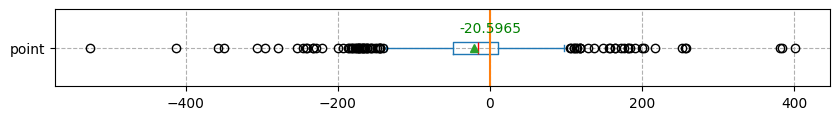

In [ ]:
df_expect = df2.copy()
# df_expect['point'] = np.where((df_expect['dir1']==df_expect['dir4']),np.where(df_expect['dir1']==1,df_expect['pct5'],-df_expect['pct5']),np.where(df_expect['dir1']==1,df_expect['pct5'],-df_expect['pct5']))
df_expect['point'] = np.where(df_expect['dir1_nq']==1,df_expect['pct5'],-df_expect['pct5'])
plt.figure(figsize=(10,2))
df_expect[['point']].plot.box(vert=False,figsize=(10,1),showmeans=True,medianprops=dict(color='red'))
plt.text(df_expect['point'].mean()-20,1.2,round(df_expect['point'].mean(),4),color='green')
plt.axvline(0,color='C001')
plt.grid(linestyle='--')

In [121]:
accuracy_matrix(df2,'dir1_nq','dir5')

Prevaience: 55.2391 %
Accuracy:33.7742 %
Precision:37.5 %
Recall:29.8343 %
F1 Score: 33.2308 %


,標的2方向=1,標的2方向=-1
標的1方向=1,162,270
標的1方向=-1,381,170


### **Extra: 夜盤跌，則隔日日盤漲的機率**

In [90]:
# data : TXF 1min OHLC
r=200
df_day_night = pd.DataFrame()
df_day_night['night_open'] = data.between_time('15:01:00','15:01:00')[['Date','Open']].fillna(0).reset_index().set_index('Date')['Open'].shift(1)
df_day_night['night_close'] = data.between_time('04:59:00','04:59:00')[['Date','Close']].fillna(0).reset_index().set_index('Date')['Close']
df_day_night['day_open'] = data.between_time('08:46:00','13:45:00').groupby('Date')['Open'].apply(list).apply(lambda x: x[0])
df_day_night['day_close'] = data.between_time('08:46:00','13:45:00').groupby('Date')['Close'].apply(list).apply(lambda x: x[-1])
df_day_night = df_day_night.dropna()
df_day_night = df_day_night.drop(df_day_night[(df_day_night==0).all(axis=1)].index)
df_day_night['Night'] = df_day_night['night_close'] - df_day_night['night_open']
df_day_night['Day'] = df_day_night['day_close'] - df_day_night['day_open']
## select range
df_day_night = df_day_night[abs(df_day_night['Night'])>r]
df_day_night['Night_dir'] = np.where(df_day_night['Night']>0,1,np.where(df_day_night['Night']<0,-1,0))
df_day_night['Day_dir'] = np.where(df_day_night['Day']>0,1,np.where(df_day_night['Day']<0,-1,0))
df_day_night

,night_open,night_close,day_open,day_close,Night,Day,Night_dir,Day_dir
Date,,,,,,,,
2019-08-06,10380.0,10144.0,10096,10331,-236.0,235,-1,1
2020-02-26,11549.0,11342.0,11383,11420,-207.0,37,-1,1
2020-03-10,10957.0,10737.0,10830,10984,-220.0,154,-1,1
2020-03-13,10362.0,9819.0,9749,10016,-543.0,267,-1,1
2020-03-17,9623.0,9206.0,9379,9363,-417.0,-16,-1,-1
...,...,...,...,...,...,...,...,...
2025-01-07,23636.0,23860.0,23965,23752,224.0,-213,1,-1
2025-01-08,23758.0,23479.0,23549,23450,-279.0,-99,-1,-1
2025-01-16,22530.0,22969.0,23080,23031,439.0,-49,1,-1


In [91]:
accuracy_matrix(df_day_night,'Night_dir','Day_dir')

Prevaience: 53.5714 %
Accuracy:50.0 %
Precision:53.3333 %
Recall:53.3333 %
F1 Score: 53.3333 %


,標的2方向=1,標的2方向=-1
標的1方向=1,24,21
標的1方向=-1,21,18


<Figure size 1000x200 with 0 Axes>

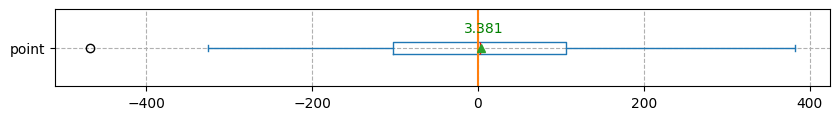

In [92]:
df_expect = df_day_night.copy()
df_expect['point'] = np.where(df_expect['Night_dir']==-1,df_expect['Day'],-df_expect['Day'])
plt.figure(figsize=(10,2))
df_expect[['point']].plot.box(vert=False,figsize=(10,1),showmeans=True,medianprops=dict(color='red'))
plt.text(df_expect['point'].mean()-20,1.2,round(df_expect['point'].mean(),4),color='green')
plt.axvline(0,color='C001')
plt.grid(linestyle='--')